# Aula 12 &mdash; Construindo visualizações efetivas

Renato Vimieiro

rv2 {em} cin.ufpe.br

maio 2017

In [1]:
from IPython.display import YouTubeVideo, HTML, Image
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

% matplotlib inline

## Introdução

As aulas anteriores foram dedicadas ao aprendizado das bibliotecas de visualização. Discutimos brevemente que as visualizações possuem dois objetivos básicos em ciência dos dados: explicação e exploração. As visualizações têm papel fundamental para análise exploratória de dados. Isso ficou bastante evidente com o quarteto de Anscombe, mas também com o gráfico da expectativa de vida, onde pudemos perceber uma queda brusca na expectativa de vida da África do Sul no início da década de 1990. O segundo papel, explicação, é tão importante quanto o primeiro. Nesse caso, as visualizações facilitam a comunicação e a absorção de informações através de nossas capacidades de processamento de estímulos visuais. Contudo, a visualização para ser efetiva deve reduzir a carga de processamento cognitivo. Assim, a aula de hoje tem por objetivo discutir aspectos que contribuem para aumentar a legibilidade das visualizações, tornando-as, dessa forma, mais efetivas na comunicação/explicação dos resultados.

## Visualizações efetivas

O Prof. Hanspeter Pfister enumera no curso CS109 de Harvard cinco características de uma visualização efetiva. São elas:

1. [Dignidade nas visualizações](#Dignidade-nas-visualizações)
2. [Mantenha as visualizações simples](#Matenha-a-visualização-simples)
3. [Use o mecanismo correto de visualização](#Uso-do-mecanismo-correto)
4. [Use cores estrategicamente](#Use-cores-estrategicamente)
5. [Conte uma estória com os dados](#Contando-uma-estória-com-os-dados)

Essas características, de fato, são consideradas importantes por muitos profissionais da área. Inclusive, um livro que discute amplamente essas características é o ["Storytelling with Data: A Data Visualization Guide for Business Professionals"](http://www.storytellingwithdata.com/book/) de Cole Nussbaumer Knaflic.

Eu particularmente penso que, dentre as cinco características elencadas acima, a mais importante é a última. Por melhor que seja o gráfico, se não existir uma estória por trás, a visualização se torna sem sentido. Isso é algo que aparenta ser trivial. E é. Porém, observo com muito frequência o uso de gráficos e visualizações que não contam nada de novo, ou que não possuem uma estória por trás, e que muitas vezes estão totalmente desconectadas do contexto onde aparecem (sobretudo em textos, tanto científicos quanto noticiários). Dessa forma, iniciaremos a discussão por esse item.

## Contando uma estória com os dados

Existem vários bons exemplos de como contar uma estória com os dados. Um autor que se ~~destaca~~ destacava (eu não sabia que ele tinha morrido em 7 de fevereiro de 2017, segundo a Wikipedia, até o momento que terminei essa aula 02/05/17) com frequência foi o estatístico Hans Rosling. Existem vários vídeos na internet com palestras em que ele narra uma estória, usando visualizações. Para ilustrar como uma boa estória afeta a qualidade da visualização, vamos assistir uma de suas palestras, essa gravada para a BBC.

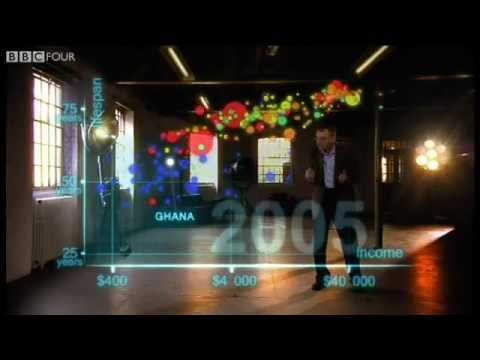

In [2]:
YouTubeVideo("-XvxlfoW4ls",height=400,width=600)

Observem que a visualização serve de suporte para reduzir a carga cognitiva e facilitar a comunicação da estória. Ele contextualiza as visualizações, o que nos permite rapidamente processar a mensagem que ele tenta passar. Em outras palavras, o gráfico é um 'mero' recurso de comunicação da estória dos países focada em dois aspectos: renda e expectativa de vida. A visualização, além de ser esteticamente bonita, é também muito efetiva para transmitir a mensagem que ele queria passar.

## Dignidade nas visualizações

Outro aspecto muito importante ao se construir visualizações é a manutenção da dignidade/integridade na transmissão da informação. Esse aspecto diz respeito a comunicar aquilo que é observado nos dados da maneira mais íntegra possível sem deturpar ou manipular as visualizações para atender a outros interesses.

Infelizmente, dadas as diversas interferências de disputa de poder político e financeiro nos meios de comunicação no Brasil e no mundo, muitas visualizações são alteradas de maneira a maquiar os dados. A internet está repleta de exemplos negativos nesse sentido. Veremos alguns aqui.

#### Exemplo 1 -- NBC (EUA)

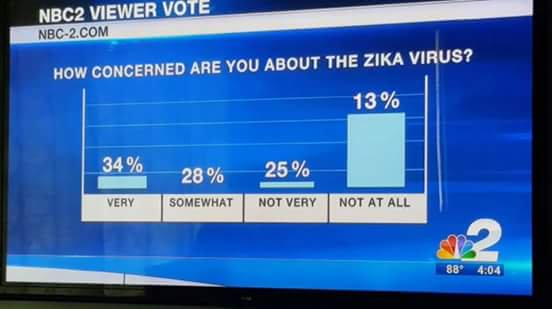

In [3]:
Image("https://pbs.twimg.com/media/CqAJtRLUAAIDJ2Y.jpg")

#### Exemplo 2 -- Globo News

In [4]:
Image(url="http://www.revistaforum.com.br/blogdorovai/wp-content/uploads/2014/01/grafico-inflacao.jpg")

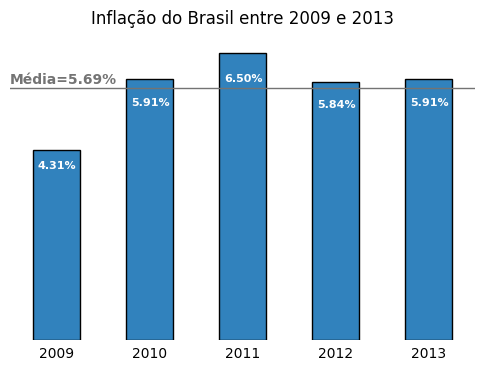

In [5]:
d = pd.read_csv(StringIO('''ano;ipca
2009;4,31
2010;5,91
2011;6,50
2012;5,84
2013;5,91'''),decimal=',',sep=';')
ax = d.set_index('ano').plot.bar(legend=False,color='#3182bd')
plt.xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
plt.axhline(y=5.694,color='#737373')
ax.annotate('Média={:.2f}%'.format(5.694), 
                (-0.5, 5.8),
                color='#737373',fontsize=10,fontweight='bold')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height())), 
                (p.get_x()+0.05, p.get_height() * 0.899),
                color='white',fontsize=8,fontweight='bold') 

ax.set_title("Inflação do Brasil entre 2009 e 2013")    
ax.get_yaxis().set_ticks([])
ax.patch.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off')


#### Exemplo 3 -- Blog Impávido Colosso (Revista Veja)

In [6]:
Image(url="https://abrilveja.files.wordpress.com/2016/12/paises-mais-inovadores-do-mundo.gif?w=600&h=400")

## Uso do mecanismo correto

Novamente, é importante reforçar que o senso comum nem sempre nos leva ao caminho correto. Hoje, com a facilidade de plotar gráficos com as diversas ferramentas digitais, existe uma forte tendência de produzir os chamados infográficos. Esses quase sempre são pouquíssimo efetivos. Abusam de elementos visuais, poluindo o gráfico e dificultando a comunicação da informação. Além de observar todos os outros princípios, é importante escolher o mecanismo adequado para comunicar a informação. A seguir veremos alguns contra-exemplos de visualizações que falham na escolha do meio.

#### Exemplo 1

In [7]:
Image(url="http://snippets.com/images/beer-consumption/beer-consumption-by-country.jpg",height=400)

In [8]:
dados = '''Country;Bottles Per Person Per Week
Czech Replublic;8.5
Ireland;7.1
Germany;6.3
Australia;6.0
United Kingdom;5.4
United States;4.4
Canada;3.7
South Africa;3.2
Mexico;2.8
Japan;2.8
Brazil;2.6
China;1.2'''

df = pd.read_csv(StringIO(dados),sep=';',index_col=0)

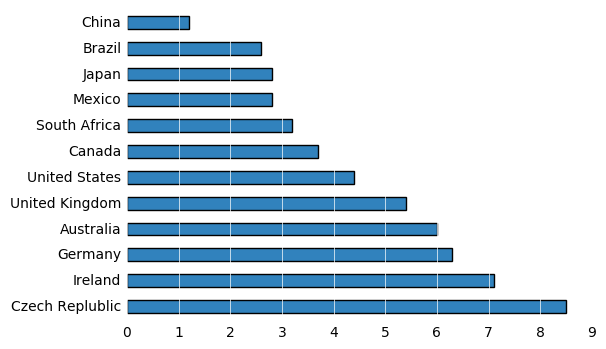

In [9]:
ax = df.plot.barh(legend=False,color='#3182bd')
plt.ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off')
ax.grid(axis='x',color='white',zorder=0,linestyle='-')

#### Exemplo 2

In [10]:
df = pd.read_csv(StringIO('''Feel;Before;After
Bored;0.11;0.12
Not great;0.05;0.06
OK;0.4;0.14
Kind of interested;0.25;0.3
Excited;0.19;0.38'''),sep=';',index_col=0)
df.head()

,Before,After
Feel,,
Bored,0.11,0.12
Not great,0.05,0.06
OK,0.40,0.14
Kind of interested,0.25,0.30
Excited,0.19,0.38


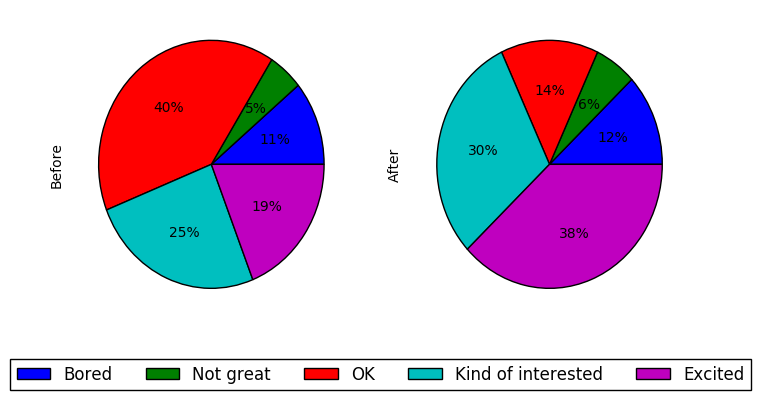

In [11]:
fig,axes = plt.subplots(ncols=2)
df.plot.pie(y='Before',ax=axes[0],autopct='%.0f%%',figsize=(8,4),legend=False,labels=None)
df.plot.pie(y='After',ax=axes[1],autopct='%.0f%%',figsize=(8,4),legend=False,labels=None)
plt.legend(labels=df.index,loc=9, bbox_to_anchor=(-0.1, -0.1), ncol=5);

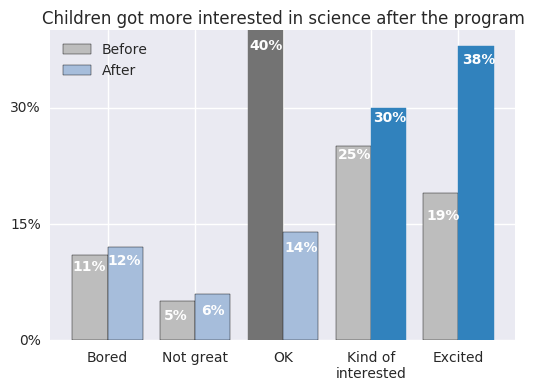

In [12]:
import seaborn as sns

df = df*100

fig,ax = plt.subplots(1,1,figsize=(6,4))

bars= df.plot.bar(ax=ax, color=['#bdbdbd','#a6bddb'],width=.8)
ax.set_xticklabels(['Bored', 'Not great', 'OK', 'Kind of\ninterested',
                    'Excited'], rotation=0);
bars.get_children()[2].set_color('#737373')
bars.get_children()[8].set_color('#3182bd')
bars.get_children()[9].set_color('#3182bd')

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))

bars = ax.patches
for p in [0,4,5,7]:
    ax.annotate('{:.0f}%'.format((bars[p].get_height())), (bars[p].get_x()*1.01, 
                                                           bars[p].get_height() * 0.82),
                color='white',fontsize=10,fontweight='bold')
for p in [2,3,8,9]:
    ax.annotate('{:.0f}%'.format((bars[p].get_height())), 
                (bars[p].get_x()*1.01, bars[p].get_height() * 0.94),
                color='white',fontsize=10,fontweight='bold') 
for p in [1,6]:
    ax.annotate('{:.0f}%'.format((bars[p].get_height())), 
                (bars[p].get_x()*1.065, bars[p].get_height() * 0.55),
                color='white',fontsize=10,fontweight='bold') 

ax.set_title("Children got more interested in science after the program")    
ax.get_yaxis().set_ticks([0,15,30])
#ax.get_yaxis().set_visible(False)
#ax.patch.set_alpha(0)
#fig.patch.set_facecolor('white')
plt.xlabel('');

In [13]:
HTML('''
<font style="color:#3182bd;font-size:20pt;">
Após o programa piloto, <br><br><br>
<span style="font-size:250%;">68%</span>
<br><br>
das crianças passaram a se interessar por ciência, <br></font>
<font style="color:#bdbdbd;font-size:20pt;line-height: 120%;">
contra 44% que já se interessavam quando ingressaram.</font>
''')

#### Tipos de gráficos e dados

Para entender a adequação dos diferentes tipos de gráficos aos diferentes tipos de dados, vamos replicar parte da aula CS109 de Harvard (https://github.com/cs109/2015/raw/master/Lectures/03-EDA.pdf) onde o Prof. Hanspeter propõe desafios aos estudantes para adivinhar quão maior é uma representação (ou o valor associado) que a outra.

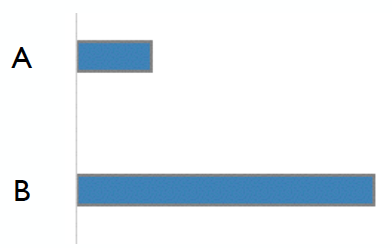

In [14]:
Image(filename='images/comprimento.png')

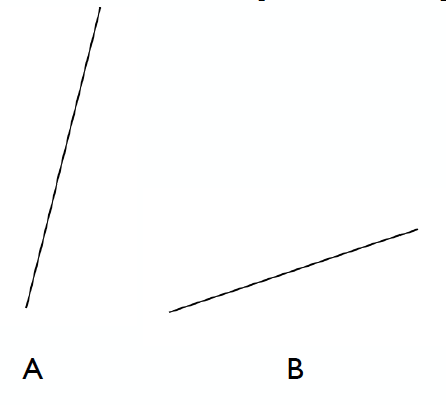

In [15]:
Image(filename='images/inclinacao.png')

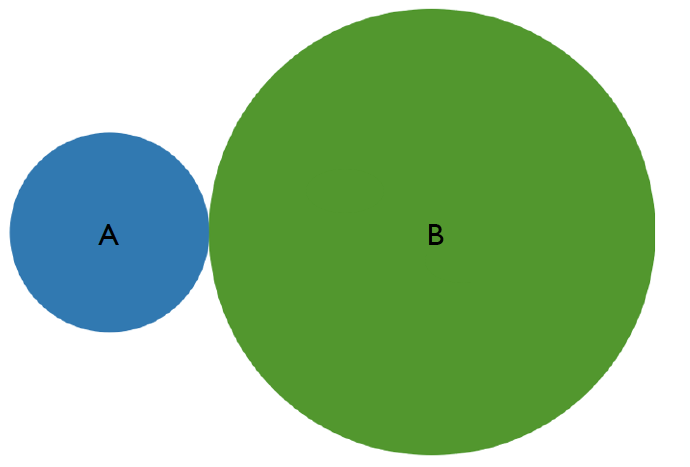

In [16]:
Image(filename='images/area.png')

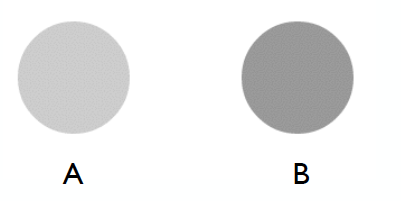

In [17]:
Image(filename='images/intensidade.png')

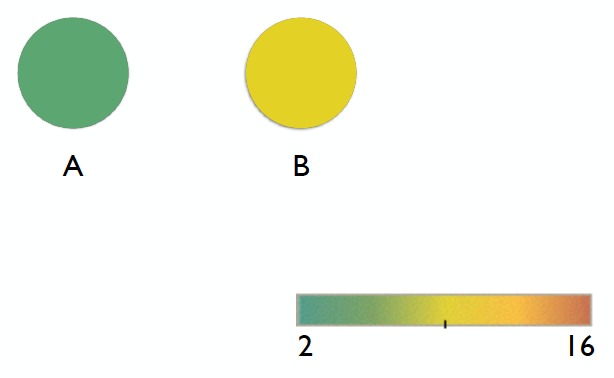

In [18]:
Image(filename='images/intensidade2.png')

Ele termina com o seguinte resumo da adequação de formas e cores aos diferentes tipos de dados. 

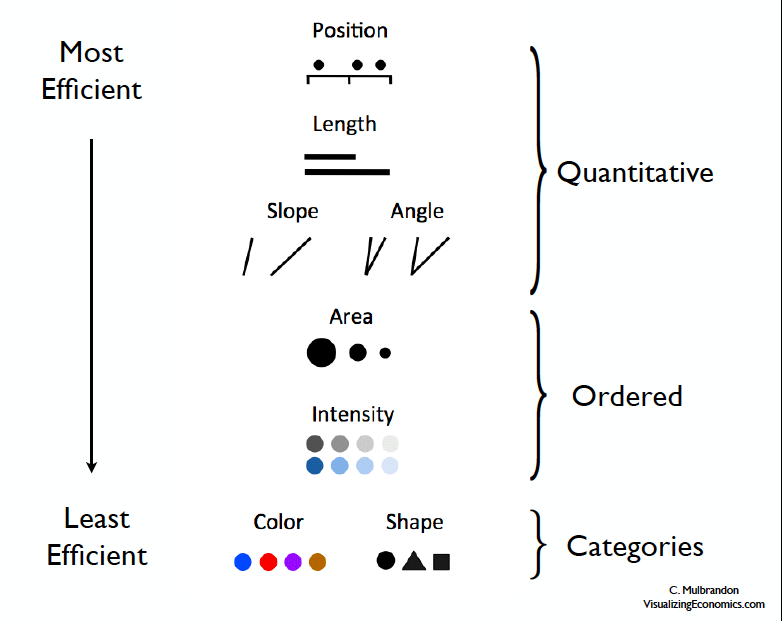

In [19]:
Image(filename='images/tipos_graficos.png')

## Use cores estrategicamente

Como vimos acima, o uso de cores para expressar quantidades é totalmente desaconselhado, uma vez que nossa capacidade visual de perceber e quantificar diferentes tons é limitada. Contudo, podemos usar cores para enfatizar aspectos importantes em nossa visualização. Cole Knaflic dedicou uma seção inteira ao uso de cores para destacar pontos de interesse nas visualizações. Ela também postou vários vídeos no YouTube onde mostra como cores podem ser usadas estrategicamente para aumentar a percepção. Um vídeo que recomendo assistir é https://www.youtube.com/watch?v=AiD6etOB6qI.

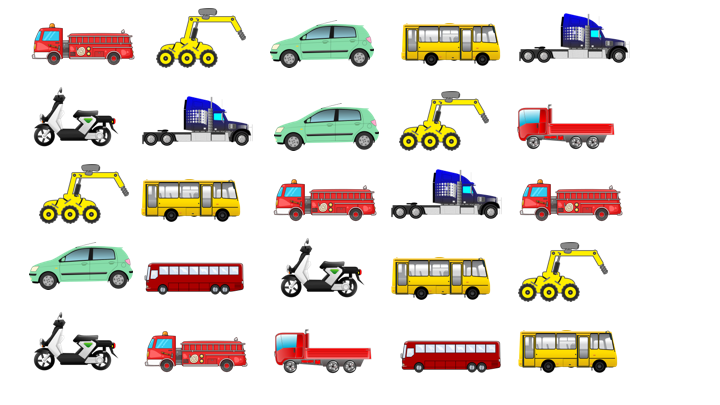

In [20]:
Image(filename='images/uso_cores_transportes.png')

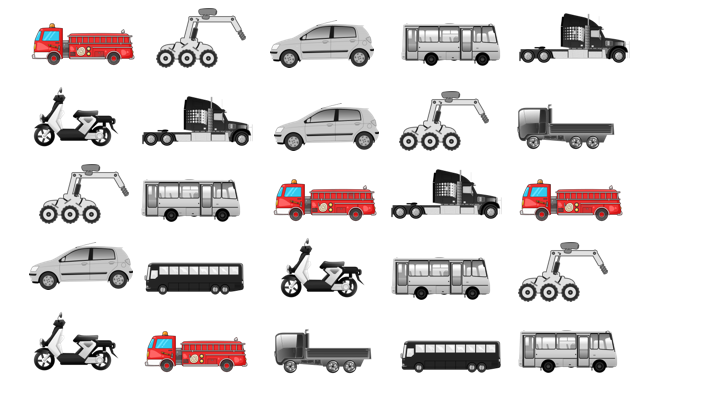

In [21]:
Image(filename='images/uso_cores_transportes_destaque.png')

O [exemplo 2](#Exemplo-2) discutido na seção do uso apropriado dos gráficos também serve para exemplificar como cores podem ser usadas estrategicamente para destacar pontos importantes na visualização. Naquele exemplo, destacamos a caída no número de crianças que achavam ciência 'OK' e o aumento no número daquelas que passaram a achar ciência interessante.

## Matenha a visualização simples

In [22]:
x = ! ls ../2017.1/data/ibge/ipca*
ipca = pd.concat([pd.read_csv(a,index_col=[0,1],header=0,sep='\t',na_values=['nan','-'],
                              decimal=',', ) for a in x], axis=1)
ipcalong = pd.melt(ipca.reset_index(),id_vars=['Regiao','OPCAO'],var_name='mes',value_name='ipca')
import locale
locale.setlocale(locale.LC_ALL, '')
ipcalong.mes = pd.to_datetime(ipcalong.mes.str.title(),format='%b/%y')
ipcalong = ipcalong[(ipcalong.Regiao=='Recife - PE')]

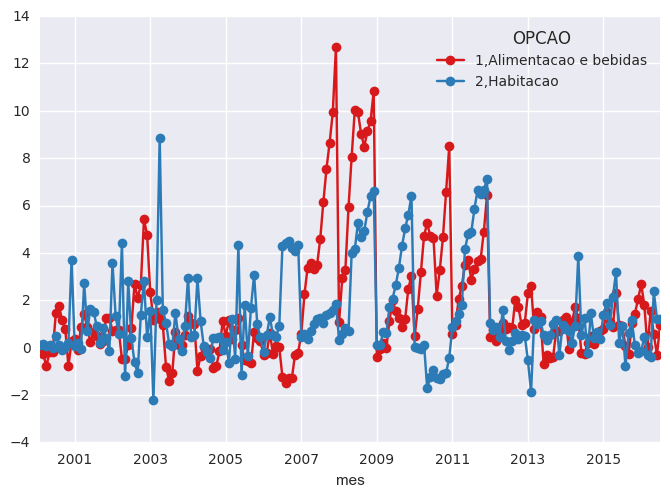

In [23]:
ipca = ipcalong.drop('Regiao',axis=1)
ipca = pd.pivot_table(ipca,index='mes',columns='OPCAO',values='ipca')
ax = ipca.loc[ipca.index>pd.datetime(year=2000,month=1,day=1),
              ['1,Alimentacao e bebidas','2,Habitacao']].plot.line(marker='o',color=['#d7191c','#2c7bb6'])

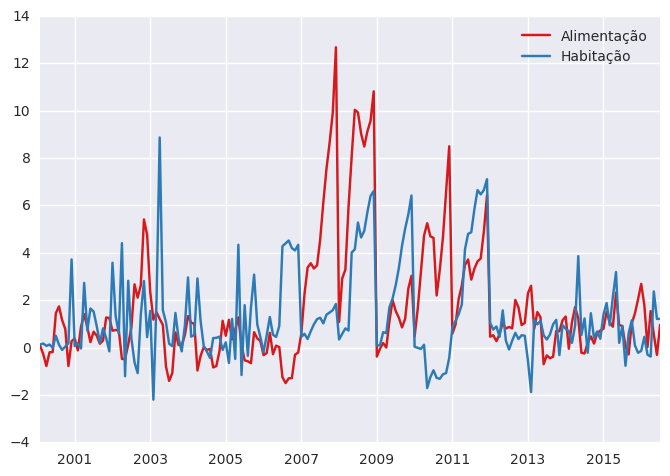

In [24]:
ax = ipca.loc[ipca.index>pd.datetime(year=2000,month=1,day=1),
              ['1,Alimentacao e bebidas','2,Habitacao']].plot.line(color=['#d7191c','#2c7bb6'])
plt.xlabel('')
ax.legend(labels=['Alimentação','Habitação'])

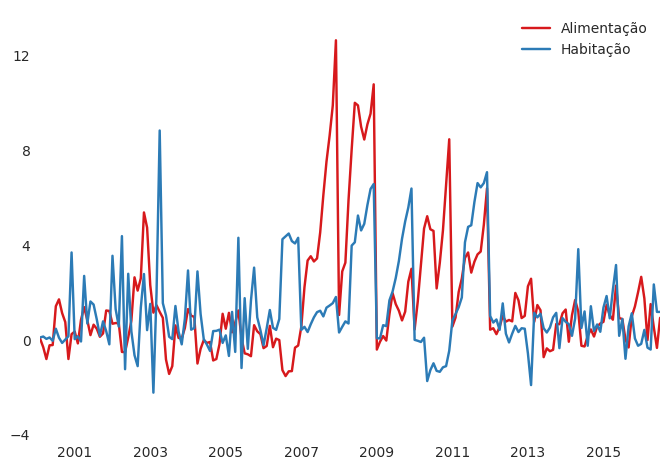

In [25]:
ax = ipca.loc[ipca.index>pd.datetime(year=2000,month=1,day=1),
              ['1,Alimentacao e bebidas','2,Habitacao']].plot.line(legend=False,
                                                                   color=['#d7191c','#2c7bb6'])
plt.xlabel('')
ax.legend(labels=['Alimentação','Habitação'])
ax.get_yaxis().set_ticks([-4,0,4,8,12])
ax.patch.set_alpha(0)